<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## Load and Prepare Data

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')

## EDA

In [ ]:
dataset.shape

(200, 5)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dataset.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataset.groupby( ['Gender'] )['Annual Income (k$)'].mean().reset_index()

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


In [ ]:
dataset.groupby( ['Gender'] )['Spending Score (1-100)'].mean().reset_index()

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


In [ ]:
dataset["Age_categ"] = pd.cut(dataset["Age"], [0, 24, 55, np.inf], labels=['Students', 'Adults', 'Seniors'])

In [ ]:
dataset.groupby( ['Age_categ'] )['Annual Income (k$)'].mean().reset_index()

,Age_categ,Annual Income (k$)
0,Students,44.657143
1,Adults,66.117647
2,Seniors,53.689655


In [ ]:
dataset.groupby( ['Age_categ'] )['Spending Score (1-100)'].mean().reset_index()

,Age_categ,Spending Score (1-100)
0,Students,56.257143
1,Adults,51.161765
2,Seniors,38.379310


# Data Preprocessing

In [ ]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Age_categ                 0
dtype: int64

In [ ]:
X = dataset.iloc[:, 2: 5].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

## Strorytelling - Visualization

Text(0, 0.5, 'Count')

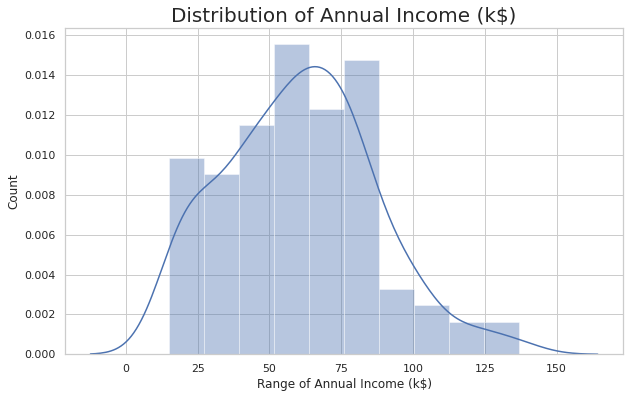

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

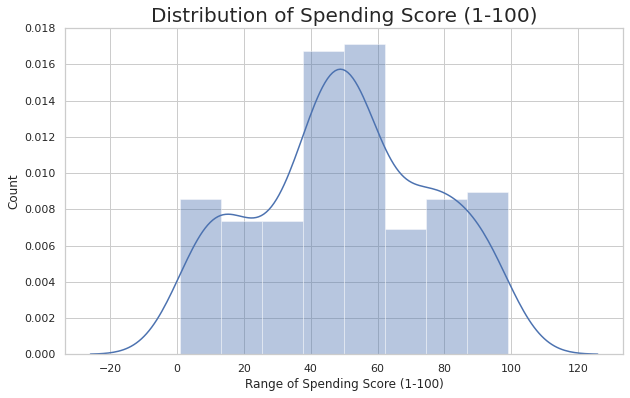

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

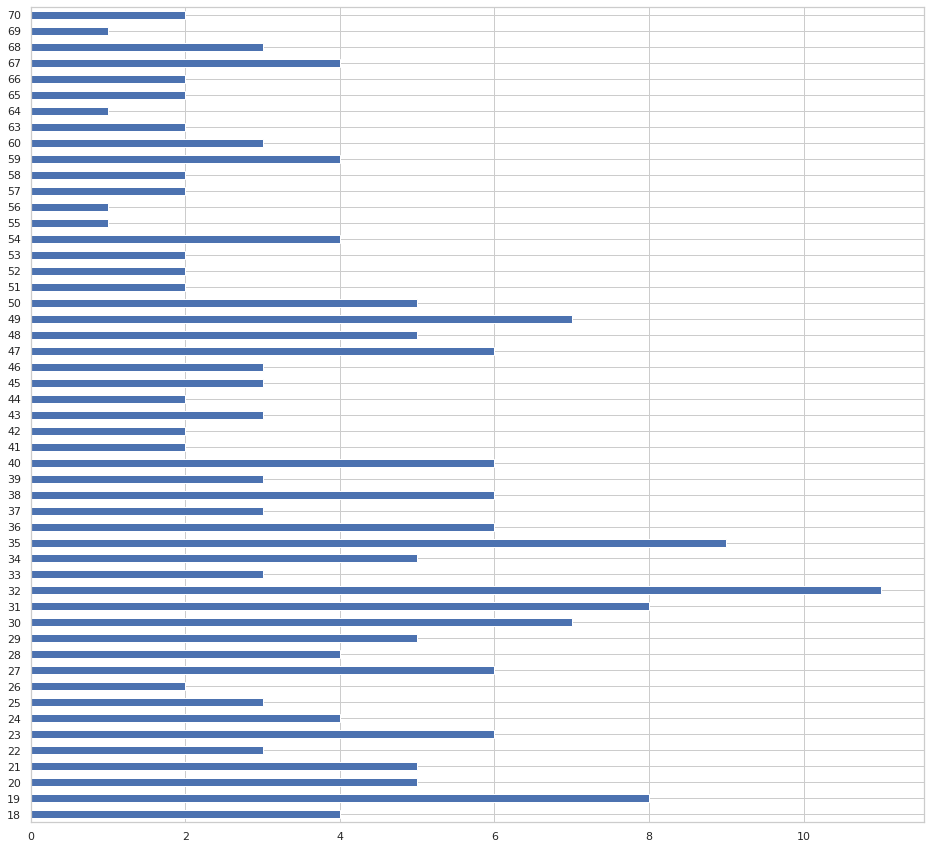

In [ ]:
fig = plt.figure(figsize=(16,15))
dataset['Age'].value_counts().sort_index().plot(kind='barh');

Text(0, 0.5, 'Count')

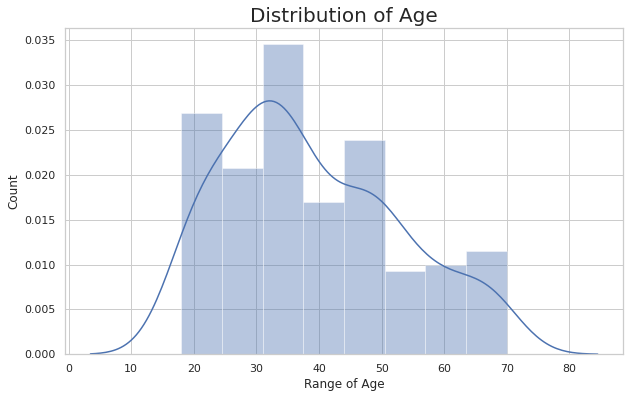

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

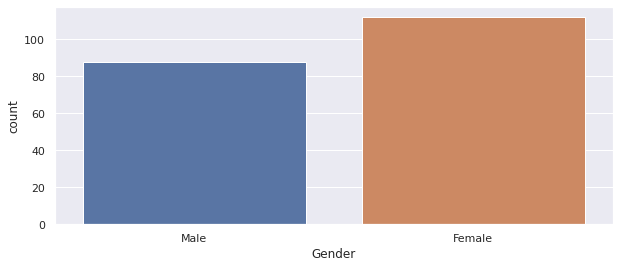

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Gender', data=dataset);

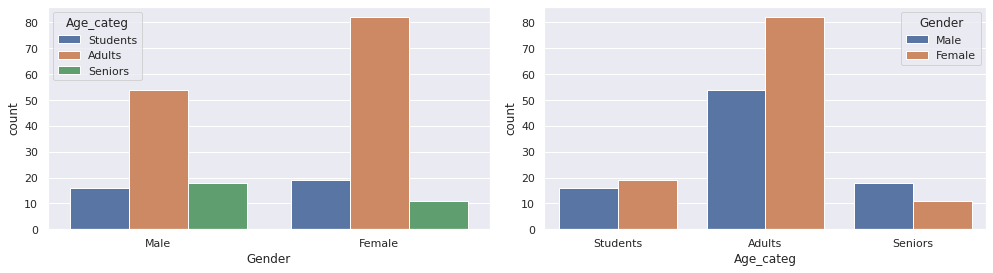

In [ ]:
fig = plt.figure(figsize=(14,4))
sns.set_theme()
plt.subplot(1,2,1)
ax = sns.countplot(x='Gender', data=dataset, hue='Age_categ');
plt.subplot(1,2,2)
ax = sns.countplot(x='Age_categ', data=dataset, hue='Gender');
fig.tight_layout(pad=1.2)

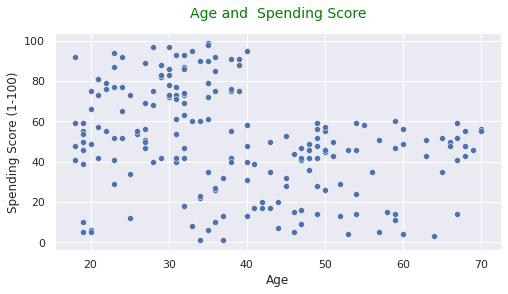

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = dataset['Age'], y = dataset['Spending Score (1-100)'])
plt.title('Age and  Spending Score', size=14, pad=15.0, color='green');

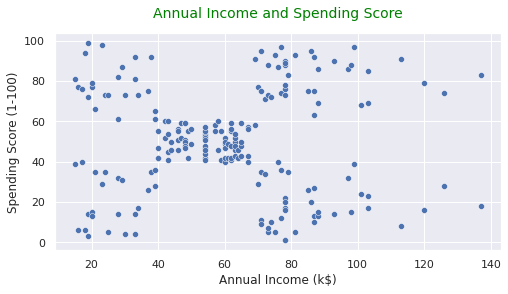

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = dataset['Annual Income (k$)'], y = dataset['Spending Score (1-100)'])
plt.title('Annual Income and Spending Score', size=14, pad=15.0, color='green');

## Trani the Model (Clustering)

# Using K-means in Action

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

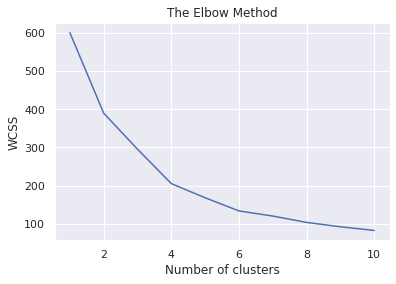

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#optimum number of clusters - 6

In [ ]:
model = KMeans(n_clusters = 6 ,init='k-means++', max_iter=600,  random_state=666, algorithm='elkan')
model.fit(X)
y_pred = model.predict(X)

df = dataset
df['label'] = y_pred

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_categ,label
0,1,Male,19,15,39,Students,3
1,2,Male,21,15,81,Students,3
2,3,Female,20,16,6,Students,5
3,4,Female,23,16,77,Students,3
4,5,Female,31,17,40,Adults,5


In [ ]:
df.label.unique()

array([3, 5, 0, 2, 1, 4], dtype=int32)

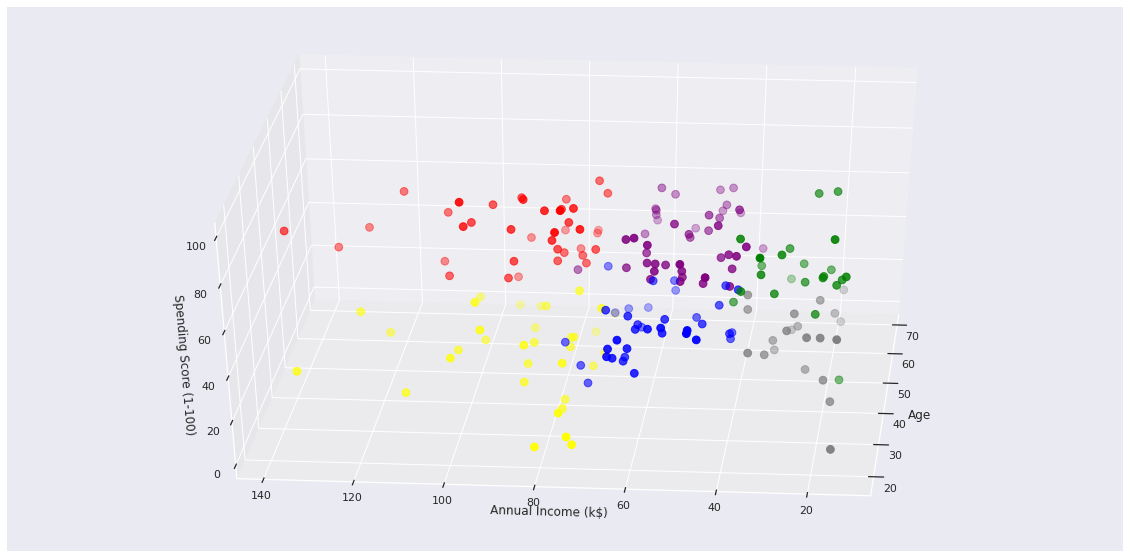

In [ ]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='purple', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='blue', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='green', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='yellow', s=60)
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='gray', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
cust1=df[df["label"]==0]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df[df["label"]==1]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df[df["label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df[df["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df[df["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")
cust6=df[df["label"]==5]
print('Number of customer in 6th group=', len(cust6))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 45
They are - [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105 107
 108 109 110 111 117 118 119 120 161]
--------------------------------------------
Number of customer in 2nd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 3rd group= 38
They are - [ 44  48  49  50  52  53  59  62  66  69  70  76  78  79  82  85  88  89
  92  94  95  96  98 100 101 104 106 112 113 114 115 116 121 122 123 125
 133 143]
--------------------------------------------
Number of customer in 4th group= 23
They are - [ 1  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 5th group= 34
They are - [127 129 131 1

# Proceed To Clustering using DBSCAN

In [ ]:
db = DBSCAN(eps=0.3, min_samples=6).fit(X)
labels2 = db.labels_

df2 = dataset
df2['label'] = labels2
df2.label.unique()

array([-1,  0,  1,  2,  3,  4])

In [ ]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_categ,label
0,1,Male,19,15,39,Students,-1
1,2,Male,21,15,81,Students,-1
2,3,Female,20,16,6,Students,-1
3,4,Female,23,16,77,Students,-1
4,5,Female,31,17,40,Adults,-1


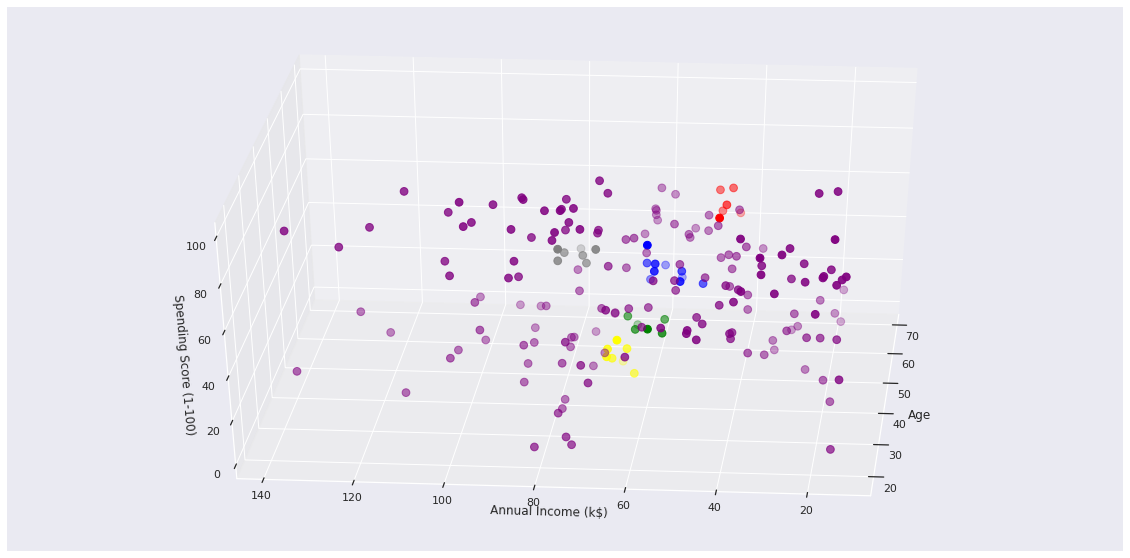

In [ ]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == -1], df2["Annual Income (k$)"][df2.label == -1], df2["Spending Score (1-100)"][df2.label == -1], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='red', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='green', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='yellow', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='gray', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
cust1=df2[df2["label"]==-1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df2[df2["label"]==0]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df2[df2["label"]==1]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df2[df2["label"]==2]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df2[df2["label"]==3]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")
cust6=df2[df2["label"]==4]
print('Number of customer in 6th group=', len(cust6))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 164
They are - [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  59  60  62  64  66  67  69  70  73  74  75  77  78  81  82
  83  85  87  89  91  94  95 101 103 107 108 109 110 111 113 117 118 119
 120 121 122 123 124 125 127 128 129 130 131 132 133 135 136 137 139 141
 142 143 144 145 146 147 149 150 151 152 153 154 155 156 157 159 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
--------------------------------------------
Number of customer in 2nd group= 6
They are - [58 61 63 65 68 71]
--------------------------------------------
Number of customer in 3rd group= 10
They are - [ 72  80  84  86  90  93  97  99 102 105]
----------------------------------------

## Send us the Result (Maktabkhoone)